In [69]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import squarify
import numpy as np
import matplotlib.ticker as mticker
# Read in the data
df = pd.read_csv('../data/final/sanitary_registry_medicines.csv')

C:\Users\Carlos Olivo\AppData\Local\Temp\ipykernel_20168\2330232942.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  create_label = lambda x: str(x[0]).capitalize() + f' \n { format((x[1] * 100 /  total_counts) / 100 ,".00%")  } ({str(x[1])})  '


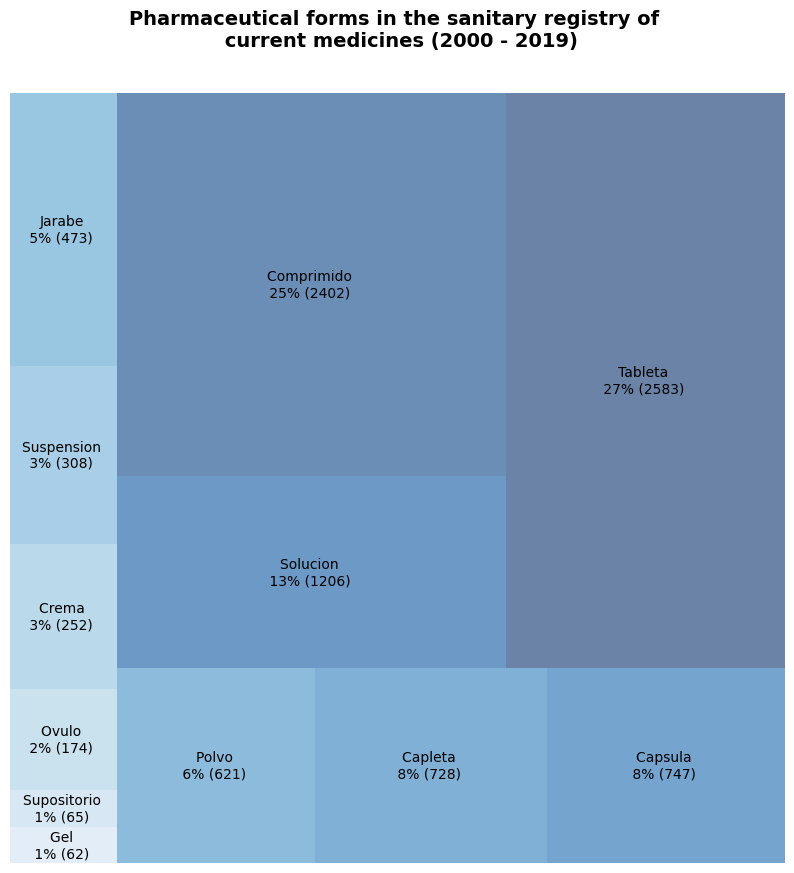

In [70]:
# Plot the count of each pharmaceutical form

pharmaceutical_forms = df.value_counts('pharmaceutical_form').reset_index(name='count').sort_values(['count'], ascending=True)

# Create a color map
cmap = matplotlib.cm.Blues
mini=min(pharmaceutical_forms['count'])
maxi=max(pharmaceutical_forms['count'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in pharmaceutical_forms['count']]

# Create the labels values
total_counts = pharmaceutical_forms['count'].sum()
min_year = df['register_year'].min()
max_year = df['register_year'].max()

create_label = lambda x: str(x[0]).capitalize() + f' \n { format((x[1] * 100 /  total_counts) / 100 ,".00%")  } ({str(x[1])})  '

# Create the labels
pharmaceutical_forms_label = pharmaceutical_forms[['pharmaceutical_form', 'count']].apply(create_label, axis=1)
title =f'Pharmaceutical forms in the sanitary registry of \n current medicines ({min_year} - {max_year})'


# Plot the treemap
plt.figure(figsize=(10,10))
squarify.plot(sizes=pharmaceutical_forms['count'], label=pharmaceutical_forms_label, alpha=.6, color=cmap(np.linspace(0.2, 1, 12)))
plt.axis('off')
plt.title(title, fontsize=14, fontweight='semibold', y=1.05)

plt.savefig('../reports/figures/pharmaceutical_forms.png', )
plt.show()




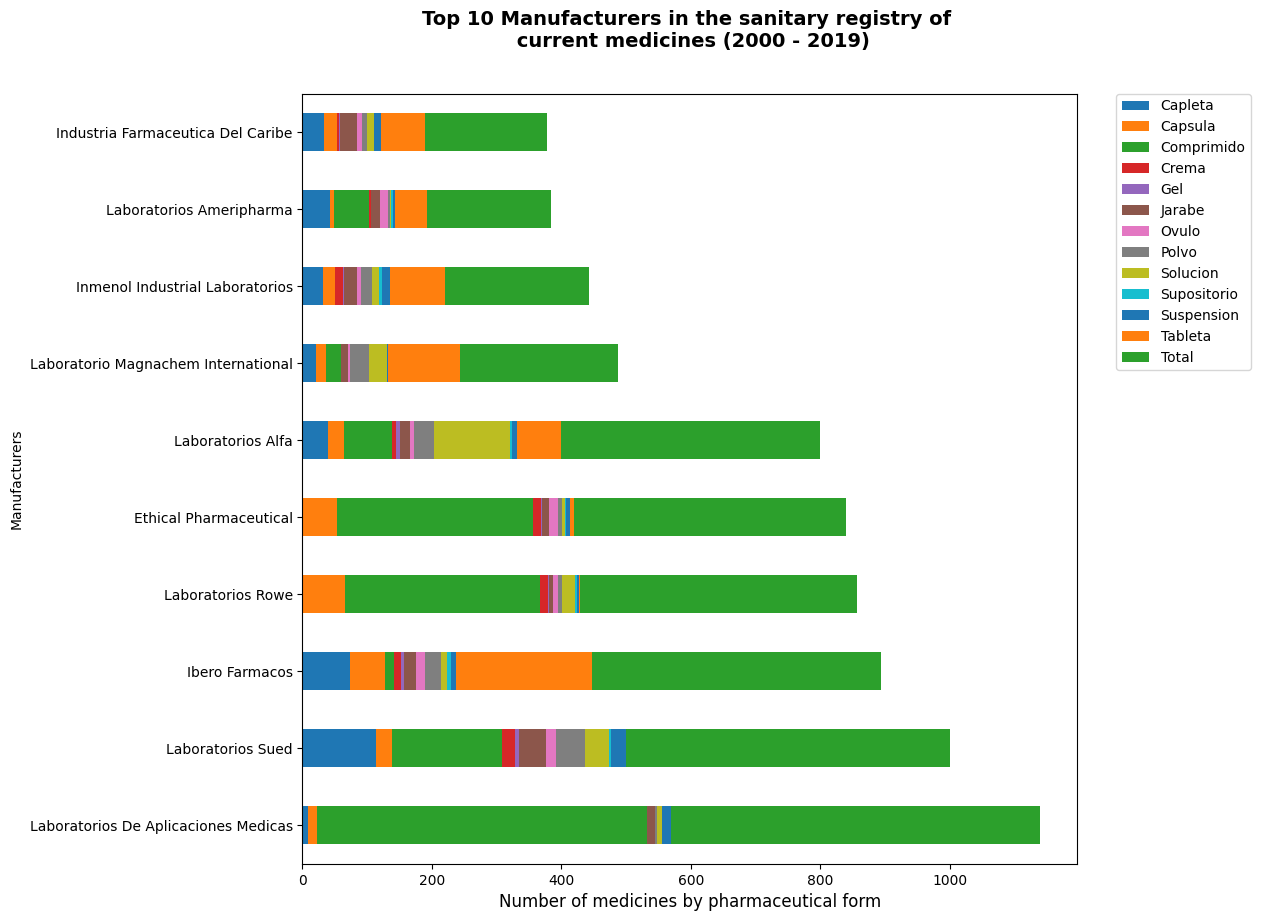

In [71]:
# Plot top 20 manufacturers in the sanitary registry of current medicines and their pharmaceutical forms 

manufacturers = df.pivot_table(index='manufacturer', columns='pharmaceutical_form', values='register_year', aggfunc='count').reset_index()
manufacturers = manufacturers.fillna(0) 

manufacturers['total'] = manufacturers.sum(axis=1, numeric_only=True)
manufacturers = manufacturers.sort_values(['total'], ascending=False)


manufacturers = manufacturers.head(10)



# Create the labels values

min_year = df['register_year'].min()
max_year = df['register_year'].max()






# Plot bard chart with the top 10 manufacturers and their pharmaceutical forms


manufacturers['manufacturer'] = manufacturers['manufacturer'].str.title()
manufacturers.columns = manufacturers.columns.str.title()

manufacturers.plot.barh(x='Manufacturer',stacked=True, figsize=(10,10), )


title =f'Top 10 Manufacturers in the sanitary registry of \n current medicines ({min_year} - {max_year})'

plt.title(title, fontsize=14, fontweight='semibold', y=1.05)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Number of medicines by pharmaceutical form', fontsize=12, )
plt.ylabel('Manufacturers')
plt.savefig('../reports/figures/manufacturers.png', )
plt.show()





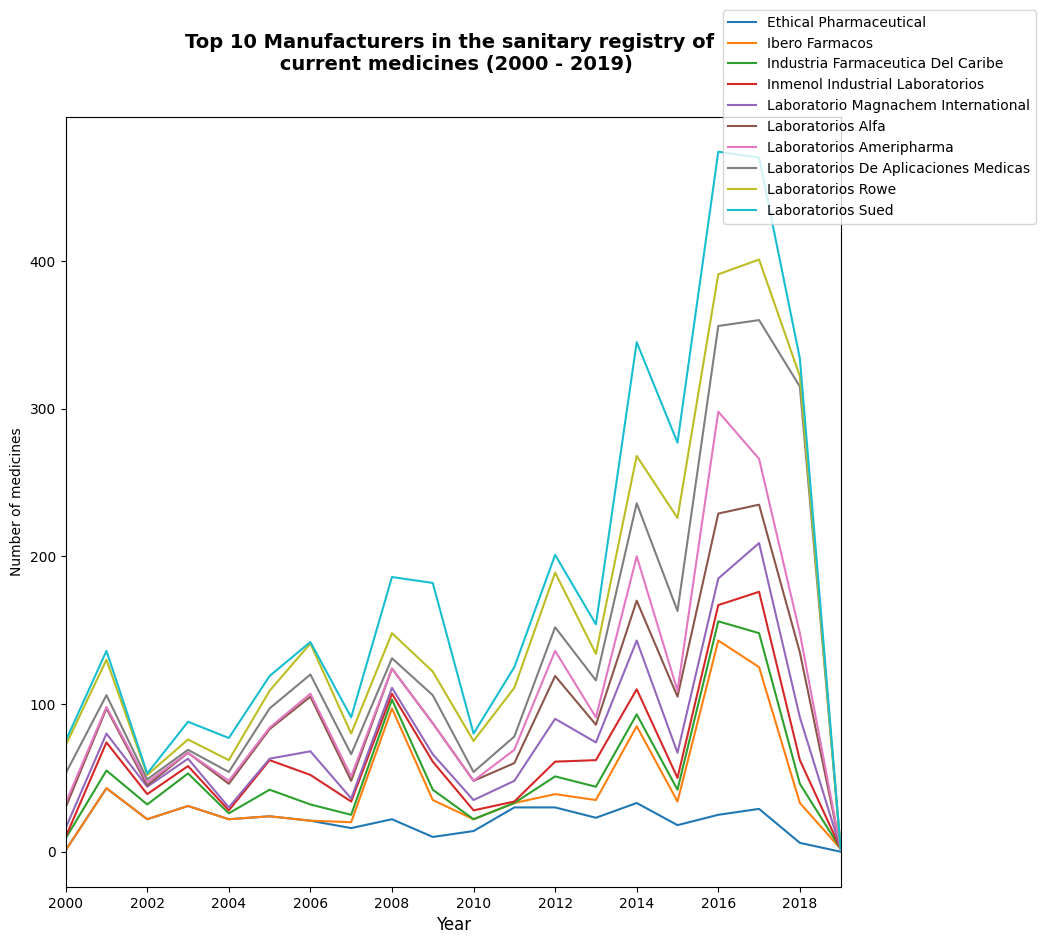

In [83]:



# Plot the historical evolution of the number of medicines for top 10  manufacturers

# Filter the dataframe to get only the columns of interest
filtered_df = df[['register_year',  'manufacturer']]

# Group the dataframe by year, form and manufacturer and count the number of medicines
filtered_df = filtered_df.groupby(['register_year', 'manufacturer']).size().reset_index(name='total')

filtered_df['manufacturer'] = filtered_df['manufacturer'].str.title()

filtered_df = filtered_df[filtered_df['manufacturer'].isin(manufacturers['Manufacturer'].values)]



 
filtered_df = filtered_df.pivot(index='register_year', columns='manufacturer', values='total').fillna(0)


filtered_df.plot.line(stacked=True, figsize=(10,10),xlim=(min_year, max_year)  ) 

title =f'Top 10 Manufacturers in the sanitary registry of \n current medicines ({min_year} - {max_year})'

plt.title(title, fontsize=14, fontweight='semibold', y=1.05)




plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year', fontsize=12, )
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))
plt.ylabel('Number of medicines')

plt.savefig('../reports/figures/manufacturers_evolution.png')
plt.show()
